In [35]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [48]:
df = pd.read_csv("../data/adult.csv")
df.head()
df = df[~df.eq("?").any(axis=1)]

salaries_gt_50k = df[df['salary'] == '>50K']['salary K$'] > 50
print(f"Consistency between 'salary' and 'salary K$' for '>50K' category: {salaries_gt_50k.all()}")

salaries_le_50k = df[df['salary'] == '<=50K']['salary K$'] <= 50
print(f"Consistency between 'salary' and 'salary K$' for '<=50K' category: {salaries_le_50k.all()}")

Consistency between 'salary' and 'salary K$' for '>50K' category: True
Consistency between 'salary' and 'salary K$' for '<=50K' category: True


# Task 1
Print the count of men and women in the dataset.

In [50]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [63]:
series_male_age = df[df["sex"] == "Male"]["age"]
series_male_age.mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [70]:
num_polish = df[df["native-country"] == "Poland"].shape[0]
all_people = df.shape[0]
print(f"Percentage of people from Poland - {num_polish / all_people * 100:.2f}%")

Percentage of people from Poland 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [78]:
people_gt_50k = df[df["salary"] == ">50K"]
print(f"Mean of the age for people who earn >50K per year - {people_gt_50k["age"].mean()}")
print(f"Standard deviation of the age for people who earn > 50K per year - {people_gt_50k["age"].std()}")
print()
people_le_50k = df[df["salary"] == "<=50K"]
print(f"Mean of the age for people who earn <=50K per year - {people_le_50k["age"].mean()}")
print(f"Standard deviation of age for people who earn <50K per year - {people_le_50k["age"].std()}")

Mean of the age for people who earn >50K per year - 43.95911028236548
Standard deviation of the age for people who earn > 50K per year - 10.269632835673852

Mean of the age for people who earn <=50K per year - 36.60806038668668
Standard deviation of age for people who earn <50K per year - 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [83]:
he = ["Bachelors", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df_without_he = df[~df["education"].isin(he)]
df_without_he[df_without_he["salary"] == ">50K"]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
52,52,47,Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,>50K,254
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32466,32466,37,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,United-States,>50K,218
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [86]:
df.groupby("education").describe()

Unnamed: 0                                                      \
                  count          mean          std    min      25%      50%   
education                                                                     
10th              820.0  16099.841463  9323.630350  219.0  7860.75  16110.5   
11th             1048.0  16230.614504  9435.727749    3.0  7773.25  16491.5   
12th              377.0  17524.734748  9160.712573  415.0  9895.00  18630.0   
1st-4th           151.0  17502.503311  9788.829534  416.0  9009.00  17445.0   
5th-6th           288.0  16845.131944  9273.562959   56.0  9557.75  17173.0   
7th-8th           557.0  16283.675045  9328.136399   15.0  8014.00  16464.0   
9th               455.0  16306.367033  9438.104861    6.0  7638.50  16734.0   
Assoc-acdm       1008.0  16667.503968  9503.534369   13.0  8176.00  16897.5   
Assoc-voc        1307.0  16520.351186  9429.290747   48.0  8453.50  16722.0   
Bachelors        5044.0  16187.880452  9355.163922    0.0  8265.75  16108.0   
Doctorate         375.0  16600.130667  9141.070844   20.0  9067.50  16573.0   
HS-grad          9840.0  16166.445935  9338.758443    2.0  8173.75  16058.5   
Masters          1627.0  16341.271051  9497.768306    5.0  8094.00  16134.0   
Preschool          45.0  18268.377778  9824.639913  224.0  8775.00  21388.0   
Prof-school       542.0  16724.850554  9575.872379   52.0  8325.50  17072.0   
Some-college     6678.0  16266.526804  9414.721651   10.0  7986.25  16238.5   

                                    age             ... hours-per-week        \
                   75%      max   count       mean  ...            75%   max   
education                                           ...                        
10th          24230.75  32551.0   820.0  37.897561  ...           40.0  99.0   
11th          24275.25  32522.0  1048.0  32.363550  ...           40.0  99.0   
12th          25040.00  32535.0   377.0  32.013263  ...           40.0  99.0   
1st-4th       27132.50  32425.0   151.0  44.622517  ...           40.0  96.0   
5th-6th       25550.25  32334.0   288.0  41.649306  ...           40.0  75.0   
7th-8th       24473.00  32517.0   557.0  47.631957  ...           40.0  99.0   
9th           24516.00  32501.0   455.0  40.303297  ...           40.0  99.0   
Assoc-acdm    24918.25  32556.0  1008.0  37.286706  ...           45.0  99.0   
Assoc-voc     24410.50  32552.0  1307.0  38.246366  ...           45.0  99.0   
Bachelors     24284.75  32538.0  5044.0  38.641554  ...           50.0  99.0   
Doctorate     24299.00  32532.0   375.0  47.130667  ...           55.0  99.0   
HS-grad       24203.00  32560.0  9840.0  38.640955  ...           44.0  99.0   
Masters       24705.00  32554.0  1627.0  43.740012  ...           50.0  99.0   
Preschool     25652.00  32432.0    45.0  41.288889  ...           40.0  75.0   
Prof-school   25123.25  32548.0   542.0  44.249077  ...           55.0  99.0   
Some-college  24486.75  32555.0  6678.0  36.135370  ...           45.0  99.0   

             salary K$                                                     \
                 count        mean         std   min   25%    50%     75%   
education                                                                   
10th             820.0   43.912195   47.890388  15.0  25.0   33.0   43.00   
11th            1048.0   41.527672   46.846283  15.0  24.0   32.0   42.00   
12th             377.0   42.761273   47.213033  15.0  24.0   33.0   43.00   
1st-4th          151.0   37.556291   34.351446  15.0  24.0   31.0   41.50   
5th-6th          288.0   39.857639   42.081933  15.0  23.0   33.0   43.00   
7th-8th          557.0   42.095153   47.388376  15.0  24.0   32.0   42.00   
9th              455.0   43.028571   50.022784  15.0  24.5   33.0   42.00   
Assoc-acdm      1008.0   75.566468   87.291460  15.0  26.0   38.0   61.25   
Assoc-voc       1307.0   76.102525   86.446091  15.0  27.0   39.0   64.00   
Bachelors       5044.0  102.832276  101.376121  15.0  29.0   44.0 

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [113]:
df_male = df[df["sex"] == "Male"]
df_married = df_male[df_male["marital-status"].str.startswith("Married")]
print("Statistics about salaries for married men:")
print(df_married["salary"].value_counts())
df_non_married = df_male.drop(df_married.index)
print("Statistics about salaries for non-married men:")
print(df_non_married["salary"].value_counts())

Statistics about salaries for married men:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64
Statistics about salaries for non-married men:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [116]:
max_hours_per_week = df["hours-per-week"].max()
print(f"Max hours per week - {max_hours_per_week}")
df[df["hours-per-week"] == max_hours_per_week].shape[0]

Max hours per week - 99


78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

                            age  hours-per-week  salary K$   Is Male  \
age                    1.000000        0.101599   0.208203  0.081993   
hours-per-week         0.101599        1.000000   0.196378  0.231268   
salary K$              0.208203        0.196378   1.000000  0.182642   
Is Male                0.081993        0.231268   0.182642  1.000000   
Is White               0.026906        0.056404   0.071669  0.105148   
Is Black              -0.014101       -0.060463  -0.074815 -0.118145   
Is Asian-Pac-Islander -0.007020       -0.006287   0.011248 -0.001560   
Is Amer-Indian-Eskimo -0.012665       -0.004122  -0.026346 -0.010411   
Is Other              -0.032347       -0.006004  -0.028320 -0.009817   
Is married             0.310553        0.221492   0.375202  0.426348   

                       Is White  Is Black  Is Asian-Pac-Islander  \
age                    0.026906 -0.014101              -0.007020   
hours-per-week         0.056404 -0.060463              -0.006287   
sal

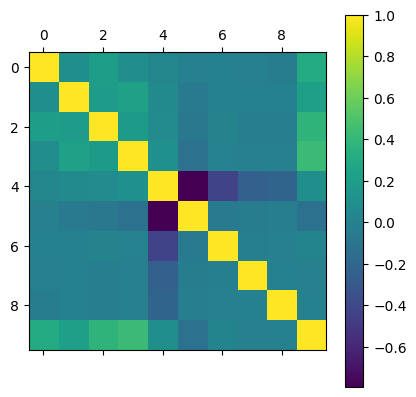

In [164]:
import matplotlib.pyplot as plt

df_numeric_only = df.select_dtypes(np.int64).iloc[:, 1:]
df_numeric_only["Is Male"] = np.where(df.sex == "Male", 1, 0)
df_numeric_only["Is White"] = np.where(df.race == "White", 1, 0)
df_numeric_only["Is Black"] = np.where(df.race == "Black", 1, 0)
df_numeric_only["Is Asian-Pac-Islander"] = np.where(df.race == "Asian-Pac-Islander", 1, 0)
df_numeric_only["Is Amer-Indian-Eskimo"] = np.where(df.race == "Amer-Indian-Eskimo", 1, 0)
df_numeric_only["Is Other"] = np.where(df.race == "Other", 1, 0)
df_numeric_only["Is married"] = np.where(df["marital-status"].str.startswith("Married"), 1, 0)
print(df_numeric_only.corr())
plt.matshow(df_numeric_only.corr())
plt.colorbar()
plt.show()